<a href="https://colab.research.google.com/github/Surendar24/Modern-Computer-Vision-PyTorch-Tensorflow2-Keras-OpenCV4--Udemy/blob/main/openCV/11_Contours_Drawing%2C_Hierarchy_and_Modes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Contours**

####**In this lesson we'll learn:**
1. Using findContours
2. Drawing Contours
3. Hierachy of Contours
4. Contouring Modes (Simple vs Approx) 

In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-02-21 05:46:39--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.22
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  12.2MB/s    in 2.3s    

2023-02-21 05:46:42 (12.2 MB/s) - ‘images.zip’ saved [29586716/29586716]



## **What are Contours?**
Contours are continous lines or curves that bound or cover the full boundary of an object.

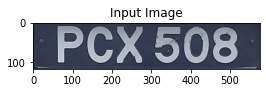

In [4]:
# Let's load a simple image license plate image
image = cv2.imread('images/LP.jpg')
imshow('Input Image', image,size = 20)

#### **Applying cv2.findContours()**

```cv2.findContours(image, Retrieval Mode, Approximation Method)```

**Retrieval Modes**
- **RETR_LIST** - Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.
- **RETR_EXTERNAL** - eturns only extreme outer flags. All child contours are left behind.
- **RETR_CCOMP** - This flag retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.
- **RETR_TREE** -  It retrieves all the contours and creates a full family hierarchy list. 

**Approximation Method Options**
- cv2.CHAIN_APPROX_NONE – Stores all the points along the line(inefficient!)
- cv2.CHAIN_APPROX_SIMPLE – Stores the end points of each line




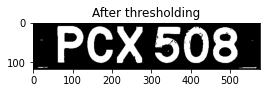

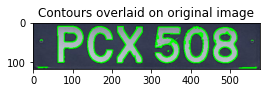

Number of Contours found = 38


In [8]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2,size = 20)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))


In [6]:
contours[0]

array([[[564, 112]],

       [[563, 113]],

       [[562, 113]],

       [[561, 113]],

       [[560, 113]],

       [[559, 113]],

       [[558, 113]],

       [[557, 113]],

       [[556, 113]],

       [[555, 113]],

       [[554, 113]],

       [[553, 113]],

       [[552, 113]],

       [[551, 113]],

       [[550, 113]],

       [[549, 113]],

       [[548, 113]],

       [[547, 113]],

       [[546, 113]],

       [[545, 113]],

       [[544, 113]],

       [[543, 113]],

       [[542, 113]],

       [[541, 113]],

       [[540, 113]],

       [[539, 113]],

       [[538, 113]],

       [[537, 113]],

       [[536, 113]],

       [[535, 113]],

       [[534, 113]],

       [[533, 113]],

       [[532, 113]],

       [[531, 114]],

       [[530, 114]],

       [[529, 114]],

       [[528, 114]],

       [[527, 114]],

       [[526, 114]],

       [[525, 114]],

       [[524, 114]],

       [[523, 114]],

       [[524, 114]],

       [[525, 114]],

       [[526, 114]],

       [[5

#### **What happens if we don't threshold? Bad things..**

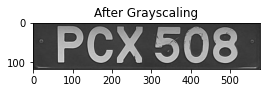

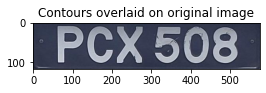

Number of Contours found = 1


In [10]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('After Grayscaling', gray,size = 20)

# Finding Contours
contours, hierarchy = cv2.findContours(gray, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
#cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))

# **NOTE: For findContours to work, the background has to be black and foreground (i.e. the text or objects)** 

#### Otherwise you'll need to invert the image by using **cv2..bitwise_not(input_image)**

#### **We can use Canny Edges instead of Thresholding**

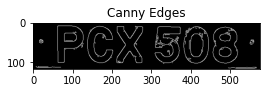

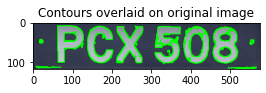

Number of Contours found = 77


In [11]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Canny Edges
edged = cv2.Canny(gray, 30, 200)
imshow('Canny Edges', edged,size = 20)

# Finding Contours
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))


## **Remember these Countouring Steps**

1. Grayscale
2. Threshold or Canny Edge Detection to Binarize image

**Note:** Blurring before Step 2 is recommended to remove noisy contours

# **Retreival Modes** 

Official Doc - https://docs.opencv.org/master/d9/d8b/tutorial_py_contours_hierarchy.html

**Hierachry**

This array stores 4 values for each contour:
- First term is the index of the Next contour
- Second term is the index of the Previous contour
- Third term is the index of the parent contour
- Forth term is the index of the child contour

### **RETR_LIST**
Retrieves all the contours, but doesn't create any parent-child relationship. Parents and kids are equal under this rule, and they are just contours. ie they all belongs to same hierarchy level.

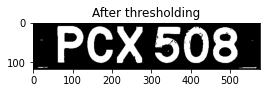

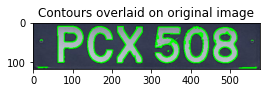

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [16 14 -1 -1]
  [17 15 -1 -1]
  [18 16 -1 -1]
  [19 17 -1 -1]
  [20 18 -1 -1]
  [21 19 -1 -1]
  [22 20 -1 -1]
  [23 21 -1 -1]
  [24 22 -1 -1]
  [25 23 -1 -1]
  [26 24 -1 -1]
  [27 25 -1 -1]
  [28 26 -1 -1]
  [29 27 -1 -1]
  [30 28 -1 -1]
  [31 29 -1 -1]
  [32 30 -1 -1]
  [33 31 -1 -1]
  [34 32 -1 -1]
  [35 33 -1 -1]
  [36 34 -1 -1]
  [37 35 -1 -1]
  [-1 36 -1 -1]]]


In [12]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2,size = 20)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_EXTERNAL**

Returns only extreme outer flags. All child contours are left behind.

In [13]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2,size = 20)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image, size = 10,size = 20)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

SyntaxError: ignored

### **RETR_CCOMP**

Retrieves all the contours and arranges them to a 2-level hierarchy. ie external contours of the object (ie its boundary) are placed in hierarchy-1. And the contours of holes inside object (if any) is placed in hierarchy-2. If any object inside it, its contour is placed again in hierarchy-1 only. And its hole in hierarchy-2 and so on.

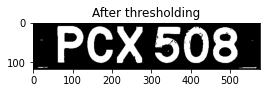

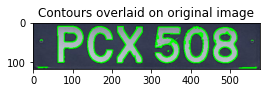

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [14]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2,size = 20)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

### **RETR_TREE**
It retrieves all the contours and creates a full family hierarchy list.

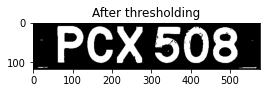

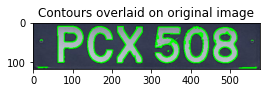

Number of Contours found = 38
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [17  9 11 -1]
  [12 -1 -1 10]
  [13 11 -1 10]
  [14 12 -1 10]
  [15 13 -1 10]
  [16 14 -1 10]
  [-1 15 -1 10]
  [25 10 18 -1]
  [19 -1 -1 17]
  [20 18 -1 17]
  [21 19 -1 17]
  [22 20 -1 17]
  [23 21 -1 17]
  [24 22 -1 17]
  [-1 23 -1 17]
  [32 17 26 -1]
  [27 -1 -1 25]
  [28 26 -1 25]
  [29 27 -1 25]
  [30 28 -1 25]
  [31 29 -1 25]
  [-1 30 -1 25]
  [35 25 33 -1]
  [34 -1 -1 32]
  [-1 33 -1 32]
  [36 32 -1 -1]
  [-1 35 37 -1]
  [-1 -1 -1 36]]]


In [15]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2,size = 20)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))
print(hierarchy)

## **Contouring Modes**

#### **CHAIN_APPROX_NONE**

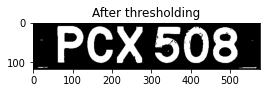

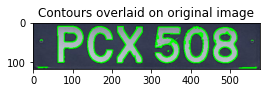

Number of Contours found = 38
87
50
7
1
1
1
1
4
2
1
236
80
6
75
10
4
8
426
6
4
4
10
14
21
17
241
6
14
15
155
14
9
358
4
4
347
272
92


In [16]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2,size = 20)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))


#### **CHAIN_APPROX_SIMPLE**

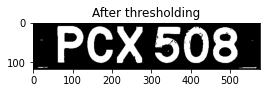

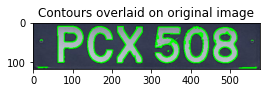

Number of Contours found = 38
8
10
7
1
1
1
1
4
2
1
114
40
6
37
6
4
8
172
6
4
4
6
6
15
11
121
6
6
8
57
8
7
170
4
4
164
65
27


In [17]:
image = cv2.imread('images/LP.jpg')

# Convert to Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('After thresholding', th2,size = 20)

# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(th2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image,size = 20)

print("Number of Contours found = " + str(len(contours)))
for c in contours:
  print(len(c))